In [ ]:
import sys
sys.path.append("../metaheuristics") 
%load_ext autoreload
%autoreload 1
# %aimport algorithme_genetique
%aimport simulated_annealing

In [1]:
cd ..

d:\Git\dir\ICO\codes


In [2]:
from metaheuristics.algorithme_genetique import*
from metaheuristics.base_problem import *
from metaheuristics.simulated_annealing import *
from loading_models import *
from vrptw import VRPTW

In [3]:
context = load_solomon('simple.csv', nb_cust=10, vehicle_speed=100)
vrptw = VRPTW(context)
neighborhood_params={   'verbose':0,
                        'init_sol':'random',
                        'choose_mode':'inter_route_swap',
                        'force_new_sol': True         
                    }

In [10]:
instance =GeneticAlgorithm(neighborhood_params=neighborhood_params)
instance.fit(vrptw)
instance.init()

In [12]:
for _ in range(100):
    instance.search()

In [13]:
instance.evolution_best_solution

[-2608.5891432103463,
 -2517.239861371455,
 -2040.6581367887861,
 -2072.830712894451,
 -2003.829328140745,
 -1942.1256786305987,
 -1937.4927972172188,
 -1552.1161334650828,
 -1496.9197481476158,
 -1474.5379540979804,
 -1431.858388627798,
 -1431.858388627798,
 -1461.697811860835,
 -1461.697811860835,
 -1439.5766721420748,
 -1456.6041369982004,
 -1387.553453383619,
 -1453.3294491209858,
 -1452.9382969374533,
 -1453.3294491209858,
 -1453.3294491209858,
 -1453.3294491209858,
 -1453.3294491209858,
 -1453.3294491209858,
 -1453.3294491209858,
 -1425.6667036401786,
 -1453.3294491209858,
 -1415.1728989485466,
 -1415.1728989485466,
 -1415.1728989485466,
 -1415.1728989485466,
 -1415.1728989485466,
 -1415.1728989485466,
 -1415.1728989485466,
 -1415.1728989485466,
 -1415.1728989485466,
 -1415.1728989485466,
 -1415.1728989485466,
 -1462.0431257061305,
 -1490.3982392703733,
 -1492.8568570657458,
 -1466.6916398874241,
 -1466.6916398874241,
 -1466.6916398874241,
 -1455.26330396957,
 -1439.5766721420748

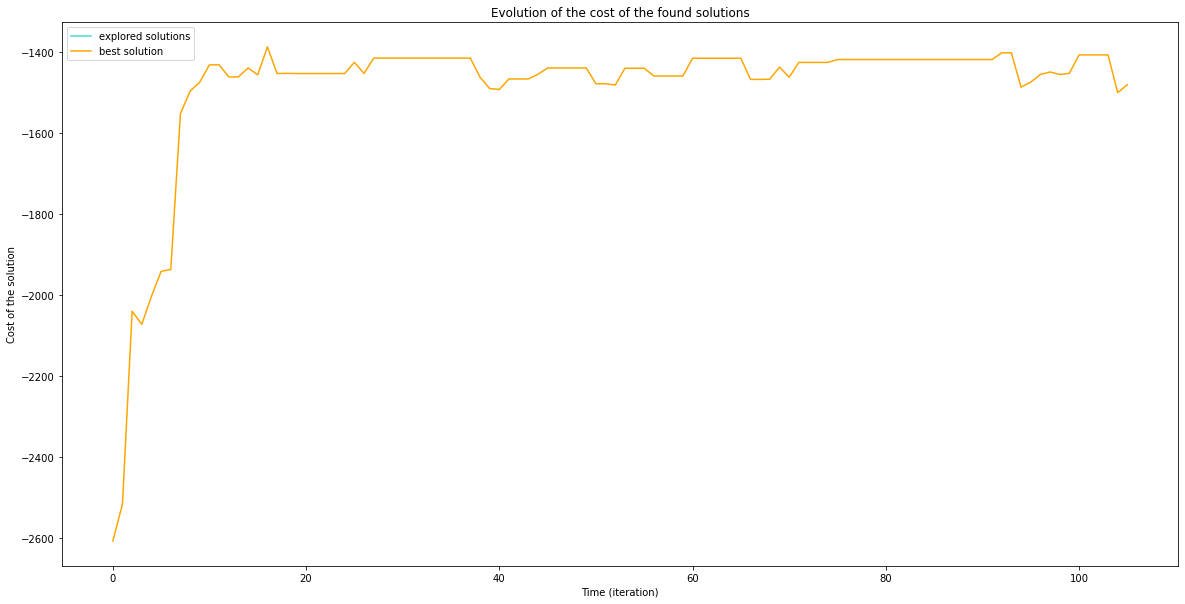

In [14]:
instance.plot_evolution_cost()

In [ ]:
_, N, _ = instance.get_problem_components()
# init_sol = N.initial_solution()
# instance.best_solution = init_sol
# instance.best_solution

In [ ]:
best_key = max(best_solutions, key=best_solutions.get)
print(best_key)

«Best records»

In [ ]:
[0, 5, 3, 7, 8, 9, 10, 6, 4, 2, 1, 0]

DATA GENERATOR

In [ ]:
import random
import numpy as np
import pandas as pd

In [ ]:
def generator_demand(low=8,high=42):
    tmp=int(np.random.normal(20,10))
    while(tmp<low or tmp>high):
        tmp=int(np.random.normal(20,10))
    return tmp

def generator_time_window(right=1300,avr_during=400,sigma_start=150,sigma_during=13):
    variance_start=sigma_start*sigma_start
    variance_during=sigma_during*sigma_during
    start=int(np.random.normal(450,variance_start))
    while(start>1050 or start<0):
        start=int(np.random.normal(450,variance_start))  
    
    during=int(np.random.normal(avr_during,variance_during))
    while(during<120):
        during=int(np.random.normal(avr_during,variance_during))  
    end=min(start+during,right)
    return start,end

def generator_datum():
    time_window = generator_time_window(1440, 650)
    start_time, end_time = time_window
    return random.randint(0, 100),random.randint(0, 100),generator_demand(),start_time,end_time,int(np.random.normal(80,3))

def generator_data(id_start,id_end):
    for i in range(id_start,id_end+1):
        print(f'{i},'+(str(generator_datum())).replace(' ','').replace('(','').replace(')','')+',')

In [ ]:
def generate_dataframe(n_customers=10):
    columns = ['CUSTNO', 'XCOORD', 'YCOORD', 'DEMAND', 'READYTIME', 'DUETIME', 'SERVICETIME']
    df = pd.DataFrame(data=([i]+list(generator_datum()) for i in range(1, n_customers+1)), columns=columns)
    df['CAPACITY'] = 200
    return df

def generate_csv(filename, n_customers):
    df = generate_dataframe(n_customers)
    df.to_csv(filename, index=False)    

In [ ]:
cd data_solomon

In [ ]:
generate_csv('A50.csv', 50)